In [1]:
import math
import numpy as np                             # numeric                       
import matplotlib.pyplot as plt                # plotting
from IPython.display import display, Image     # imported graphics
import matplotlib.cm as cm                     # contour plots 
from mpl_toolkits.mplot3d.axes3d import Axes3D # 3D plots
import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)
#sys.path.append('/content/drive/MyDrive/neural/docs/lib_nn')
from neural import * # import my library packages

Invoking __init__.py for neural


In [2]:
def dist3(p1,p2): 
    """
    Square of the Euclidean distance between points p1 and p2
    in 3 dimensions.
    """
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2

In [3]:
def phi2(ix,iy,kx,ky,d):  # proximity function for 2-dim. grid
    return np.exp(-((ix-kx)**2+(iy-ky)**2)/(d**2))  # Gaussian

In [4]:
def rgbn():
    r,g,b=np.random.random(),np.random.random(),np.random.random() # random RGB
    norm=np.sqrt(r*r+g*g+b*b)                                      # norm
    return np.array([r,g,b]/norm)                                  # normalized RGB

In [5]:
def my_dist(p1,p2, n=30):
    """
    Distance on a torus for a given square grid of the size of n
    """
    distance_x = min(abs(p1[0] - p2[0]), min(p1[0], p2[0]) + n - max(p1[0], p2[0]) )
    distance_y = min(abs(p1[1] - p2[1]), min(p1[1], p2[1]) + n - max(p1[1], p2[1]) )
    distance_z = min(abs(p1[2] - p2[2]), min(p1[2], p2[2]) + n - max(p1[2], p2[2]) )
    return distance_x**2+distance_y**2+distance_z**2

In [6]:
def generate_sample(ns=100):                          
  """ 
  Function that generates ns number of colors in the sample
  """
  samp=[rgbn() for  _ in range(ns)] # random sample

  pls=plt.figure(figsize=(4,1),dpi=120)
  plt.axis('off')
  plt.title("My sample")
  for i in range(ns): plt.scatter(i,0,color=samp[i], s=15)

  plt.show()  
  return samp

In [7]:
def create_RGB_array(size=100):
  """ 
  Creates neuron array of size x size (100 x 100)
  """
  tab=np.zeros((size,size,3))    # create array tab with zeros  

  for i in range(size):          # i index in the grid    
      for j in range(size):      # j index in the grid
          for k in range(3):     # RGB: k=0-red, 1-green, 2-blue
              tab[i,j,k]=np.random.random() # random number form [0,1]
              # 3 RGB components for neuron in the grid positin (i,j)
  return tab            

In [8]:
def plot_random_sample(tab):
  size = len(tab)
  plt.figure(figsize=(3.45,3.45),dpi=120)
  plt.title("Random colors on the grid",fontsize=10) 

  for i in range(size):
      for j in range(size):
          plt.scatter(i,j,color=tab[i][j], s=8) 
  plt.xlabel('$i$',fontsize=11)
  plt.ylabel('$j$',fontsize=11);

In [9]:
def Kohonen_algorithm(samp, tab, rounds = 150, eps = .5, de = 20,  func=dist3, phi_func = phi2):
  size = len(samp)
  for _ in range(rounds):   
    eps=eps*.995      
    de=de*.96           # de shrinks a bit faster than eps     
    for s in range(size): # loop over the points in the data sample       
        p=samp[s]       # point from the sample
        dist=[[func(p,tab[i][j]) for j in range(size)] for i in range(size)] 
                        # distance of p from all neurons
        ind_min = np.argmin(dist) # the winner index
        ind_1=ind_min//size       # a trick to get a 2-dim index
        ind_2=ind_min%size

        for j in range(size): 
            for i in range(size):
                tab[i][j]+=eps*phi_func(ind_1,ind_2,i,j,de)*(p-tab[i][j]) # update  

In [10]:
def PlotTheKohonenColorMap(tab):
  plt.figure(figsize=(3.45,3.45),dpi=120)
  plt.title("Kohonen color map",fontsize=10) 
  size = len(tab)
  for i in range(size):
      for j in range(size):
          plt.scatter(i,j,color=tab[i][j], s=8)

  plt.xlabel('$i$',fontsize=11)
  plt.ylabel('$j$',fontsize=11)
  plt.show()

In [35]:
def PlotTheTorus(my_colors_table,n=30):
  theta = np.linspace(0, 2.*np.pi, n)
  phi = np.linspace(0, 2.*np.pi, n)
  theta, phi = np.meshgrid(theta, phi)
  c, a = 5, 0.75
  x = (c + a*np.cos(theta)) * np.cos(phi)
  y = (c + a*np.cos(theta)) * np.sin(phi)
  z = a * np.sin(theta)

  fig = plt.figure(figsize=(10.,5.),dpi=120)
  plt.title("Visualisation in the form of torus",fontsize=10) 
  # ax1 = fig.add_subplot(121, projection='3d')
  # ax1.set_zlim(-3,3)
  # ax1.view_init(36, 26)
  # for i in range(n):
  #   for j in range(n):
  #     #a = i // int(math.sqrt(n))
  #     #b = i % int(math.sqrt(n))
  #     ax1.scatter3D(x[i][j], y[i][j], z[i][j], color=my_colors_table[i,j])

  ax3 = fig.add_subplot(121, projection='3d')
  ax3.set_zlim(-3,3)
  ax3.view_init(-90, 0)
  for i in range(n):
    for j in range(n):
      #a = i // int(math.sqrt(n))
      #b = i % int(math.sqrt(n))
      ax3.scatter3D(x[i][j], y[i][j], z[i][j], color=my_colors_table[i,j])
  ax3.set_xticks([])  

  ax6 = fig.add_subplot(122, projection='3d')
  ax6.set_zlim(-3,3)
  ax6.view_init(-45, 45)
  for i in range(n):
    for j in range(n):
      #a = i // int(math.sqrt(n))
      #b = i % int(math.sqrt(n))
      ax6.scatter3D(x[i][j], y[i][j], z[i][j], color=my_colors_table[i,j])
  ax6.set_xticks([])

How the custom functions work:

Generating the sample of size 30:

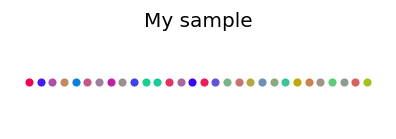

In [12]:
my_sample = generate_sample(30)

Getting the RGB array:

In [13]:
my_tab = create_RGB_array(30)

Plotting the grid:

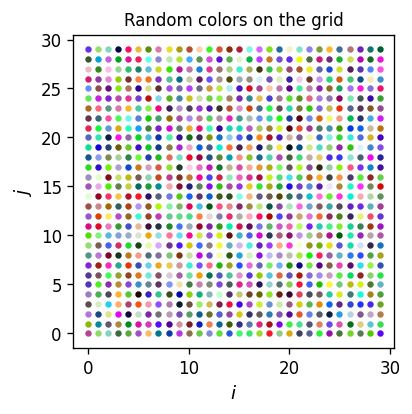

In [14]:
plot_random_sample(my_tab)

Using the Kohonen algorithm:

In [15]:
Kohonen_algorithm(my_sample, my_tab)

Plotting the results:

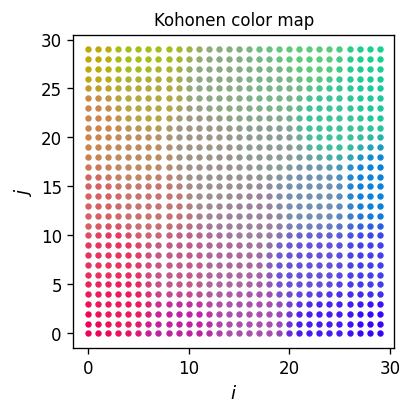

In [16]:
PlotTheKohonenColorMap(my_tab)

One function doing it all:

In [17]:
def Kohonen_RGB(n=30, rounds = 150, eps = .5, de = 20,  func=dist3, phi_func = phi2, my_type = ''):
  """
  Function that:
  * generates the sample and plots it
  * creates the randomly generated RGB array
  * plots it on the square grid
  * uses the Kohonen algorithm for grouping
  * plots the grouped color grid

  n - the size of the sample and of the array (n x n)
  rounds - nb of rounds in Kohonen algorithm
  eps - epsilon
  de - size of 'the neighbourhood'
  func - function used for calculating distance
  """
  def my_distance(p1,p2, n=n):
    """
    Distance on a torus for a given square grid of the size of n
    """
    distance_x = min(abs(p1[0] - p2[0]), min(p1[0], p2[0]) + n - max(p1[0], p2[0]) )
    distance_y = min(abs(p1[1] - p2[1]), min(p1[1], p2[1]) + n - max(p1[1], p2[1]) )
    distance_z = min(abs(p1[2] - p2[2]), min(p1[2], p2[2]) + n - max(p1[2], p2[2]) )
    #distance_z = p1[2] - p2[2]
    return distance_x**2+distance_y**2+distance_z**2

  def my_phi_func(ix,iy,kx,ky,d, n=n): # proximity function for a torus
    distance_x = min(abs(ix - kx), min(ix, kx) + n - max(ix, kx) )
    distance_y = min(abs(iy - ky), min(iy, ky) + n - max(iy, ky) )
    return np.exp(-(distance_x**2+distance_y**2)/(d**2))  # Gaussian

  if my_type == 'torus':
    func = my_distance
    phi_func = my_phi_func

  my_sample = generate_sample(n)
  my_tab = create_RGB_array(n)
  plot_random_sample(my_tab)
  #print("using function", func)
  Kohonen_algorithm(my_sample, my_tab, rounds, eps, de,  func, phi_func)
  PlotTheKohonenColorMap(my_tab)
  if my_type == 'torus':
    PlotTheTorus(my_tab, n)
  return my_tab

## **Example of Kohonen algorithm for sample of 50 without "torus" distance:**


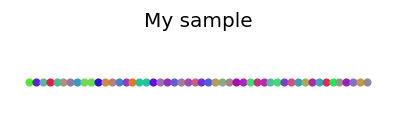

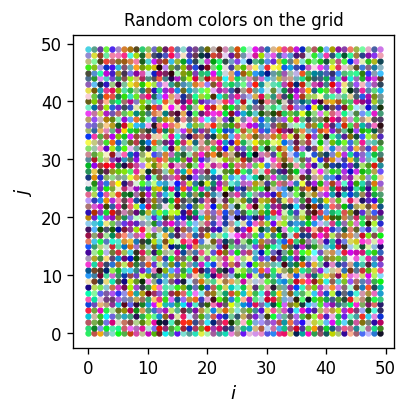

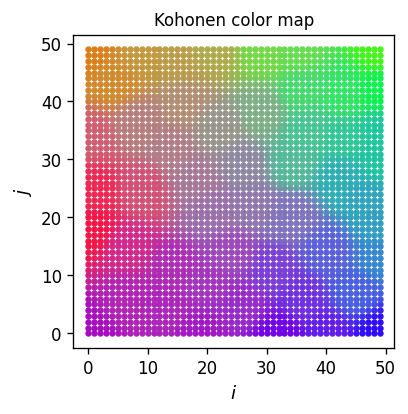

In [18]:
color_tab_50 = Kohonen_RGB(n=50)

# **Example of Kohonen algorithm for sample of 100 with "torus" distance:**

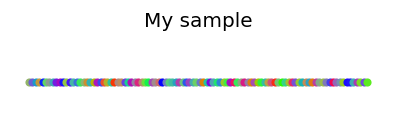

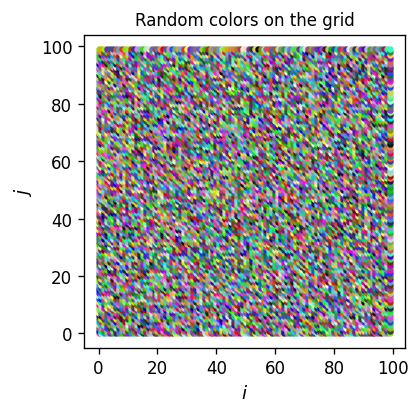

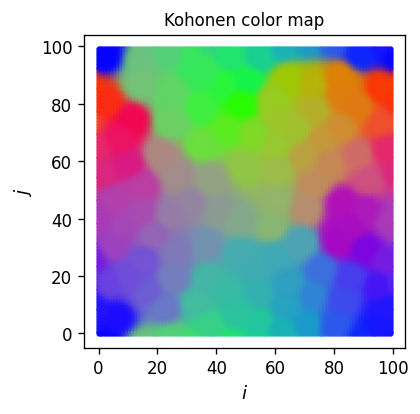

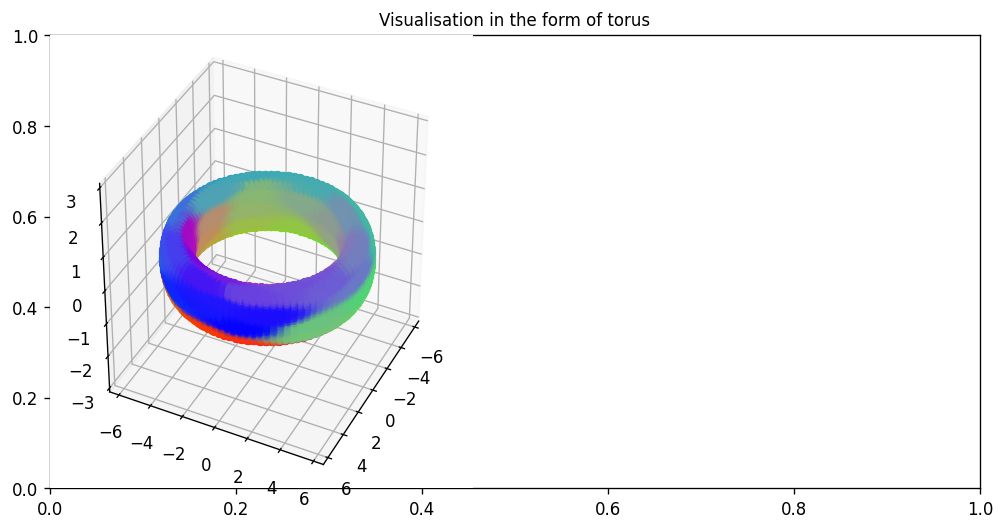

In [19]:
color_tab_100 = Kohonen_RGB(n=100, my_type='torus')

Other views at the result:

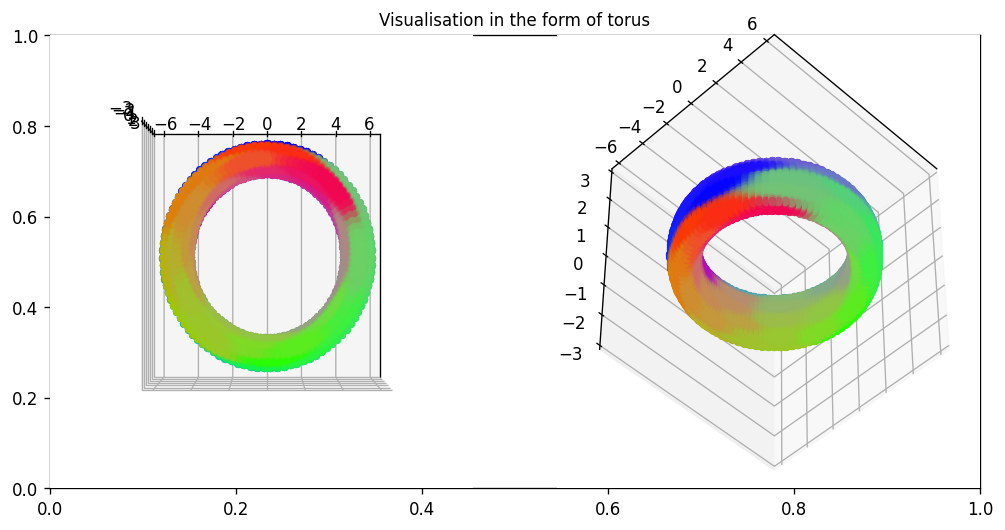

In [36]:
PlotTheTorus(color_tab_100, 100)